<a href="https://colab.research.google.com/github/Massato01/ProjetoCalculoNumericoRegressaoLinear/blob/main/ProjetoCalculoNumerico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bibliotecas

In [ ]:
import pandas                  as pd
import numpy                   as np
import matplotlib.pyplot       as plt
import seaborn                 as sns
import plotly.express          as px
import statsmodels.formula.api as sm
from scipy.stats               import pearsonr
from statsmodels.api           import OLS
from sklearn.linear_model      import LinearRegression
from sklearn.model_selection   import train_test_split
from sklearn.metrics           import r2_score
from imblearn.over_sampling    import SMOTE
from sklearn.preprocessing     import MinMaxScaler

# **Importação e tratamento dos dados**

In [ ]:
df_wine = pd.read_csv('/content/winequality-red.csv')
df_wine.shape

(1599, 12)

## Verificando as colunas presentes

In [ ]:
[i for i in df_wine.columns]

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

## Verificando o tipo dos dados

In [ ]:
df_wine.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

## Verificando NaN

In [ ]:
df_wine.isna().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

# **Análises preliminares**

In [ ]:
df_wine.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

## Estatística descritiva

In [ ]:
df_wine.describe().round(2)

fixed acidity  volatile acidity  citric acid  residual sugar  \
count        1599.00           1599.00      1599.00         1599.00   
mean            8.32              0.53         0.27            2.54   
std             1.74              0.18         0.19            1.41   
min             4.60              0.12         0.00            0.90   
25%             7.10              0.39         0.09            1.90   
50%             7.90              0.52         0.26            2.20   
75%             9.20              0.64         0.42            2.60   
max            15.90              1.58         1.00           15.50   

       chlorides  free sulfur dioxide  total sulfur dioxide  density       pH  \
count    1599.00              1599.00               1599.00  1599.00  1599.00   
mean        0.09                15.87                 46.47     1.00     3.31   
std         0.05                10.46                 32.90     0.00     0.15   
min         0.01                 1.00                  6.00     0.99     2.74   
25%         0.07                 7.00                 22.00     1.00     3.21   
50%         0.08                14.00                 38.00     1.00     3.31   
75%         0.09                21.00                 62.00     1.00     3.40   
max         0.61                72.00                289.00     1.00     4.01   

       sulphates  alcohol  quality  
count    1599.00  1599.00  1599.00  
mean        0.66    10.42     5.64  
std         0.17     1.07     0.81  
min         0.33     8.40     3.00  
25%         0.55     9.50     5.00  
50%         0.62    10.20     6.00  
75%         0.73    11.10     6.00  
max         2.00    14.90     8.00

## Mapa de correlação

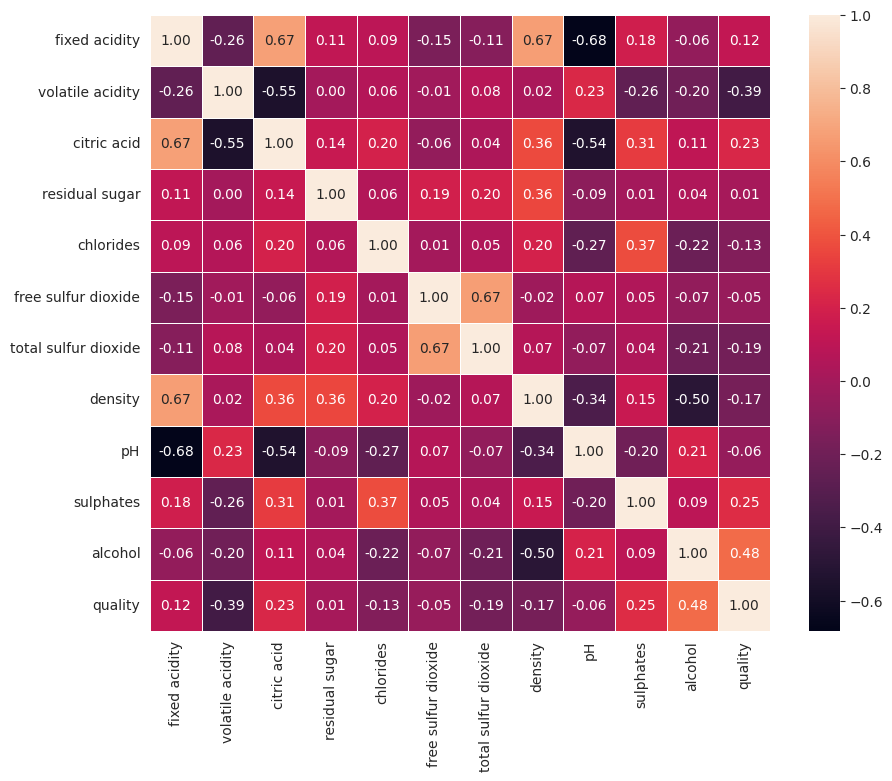

In [ ]:
corr = df_wine.corr().round(4)
plt.figure(figsize=(10,8  ))
ax = sns.heatmap(corr, annot = True, fmt=".2f", linewidths=.6)

> ### Correlações fortes (exemplos):
> * fixed acidity & citric acid
> * fixed acidity & density
> * free sulfur dioxide & total sulfur dioxide

**Obs: Class possui forte correlação com todas as colunas**

# **Análises gráficas**

In [ ]:
sns.set_palette("Set2")
sns.set_style("darkgrid")

## Visualizando o comportamento entre as colunas

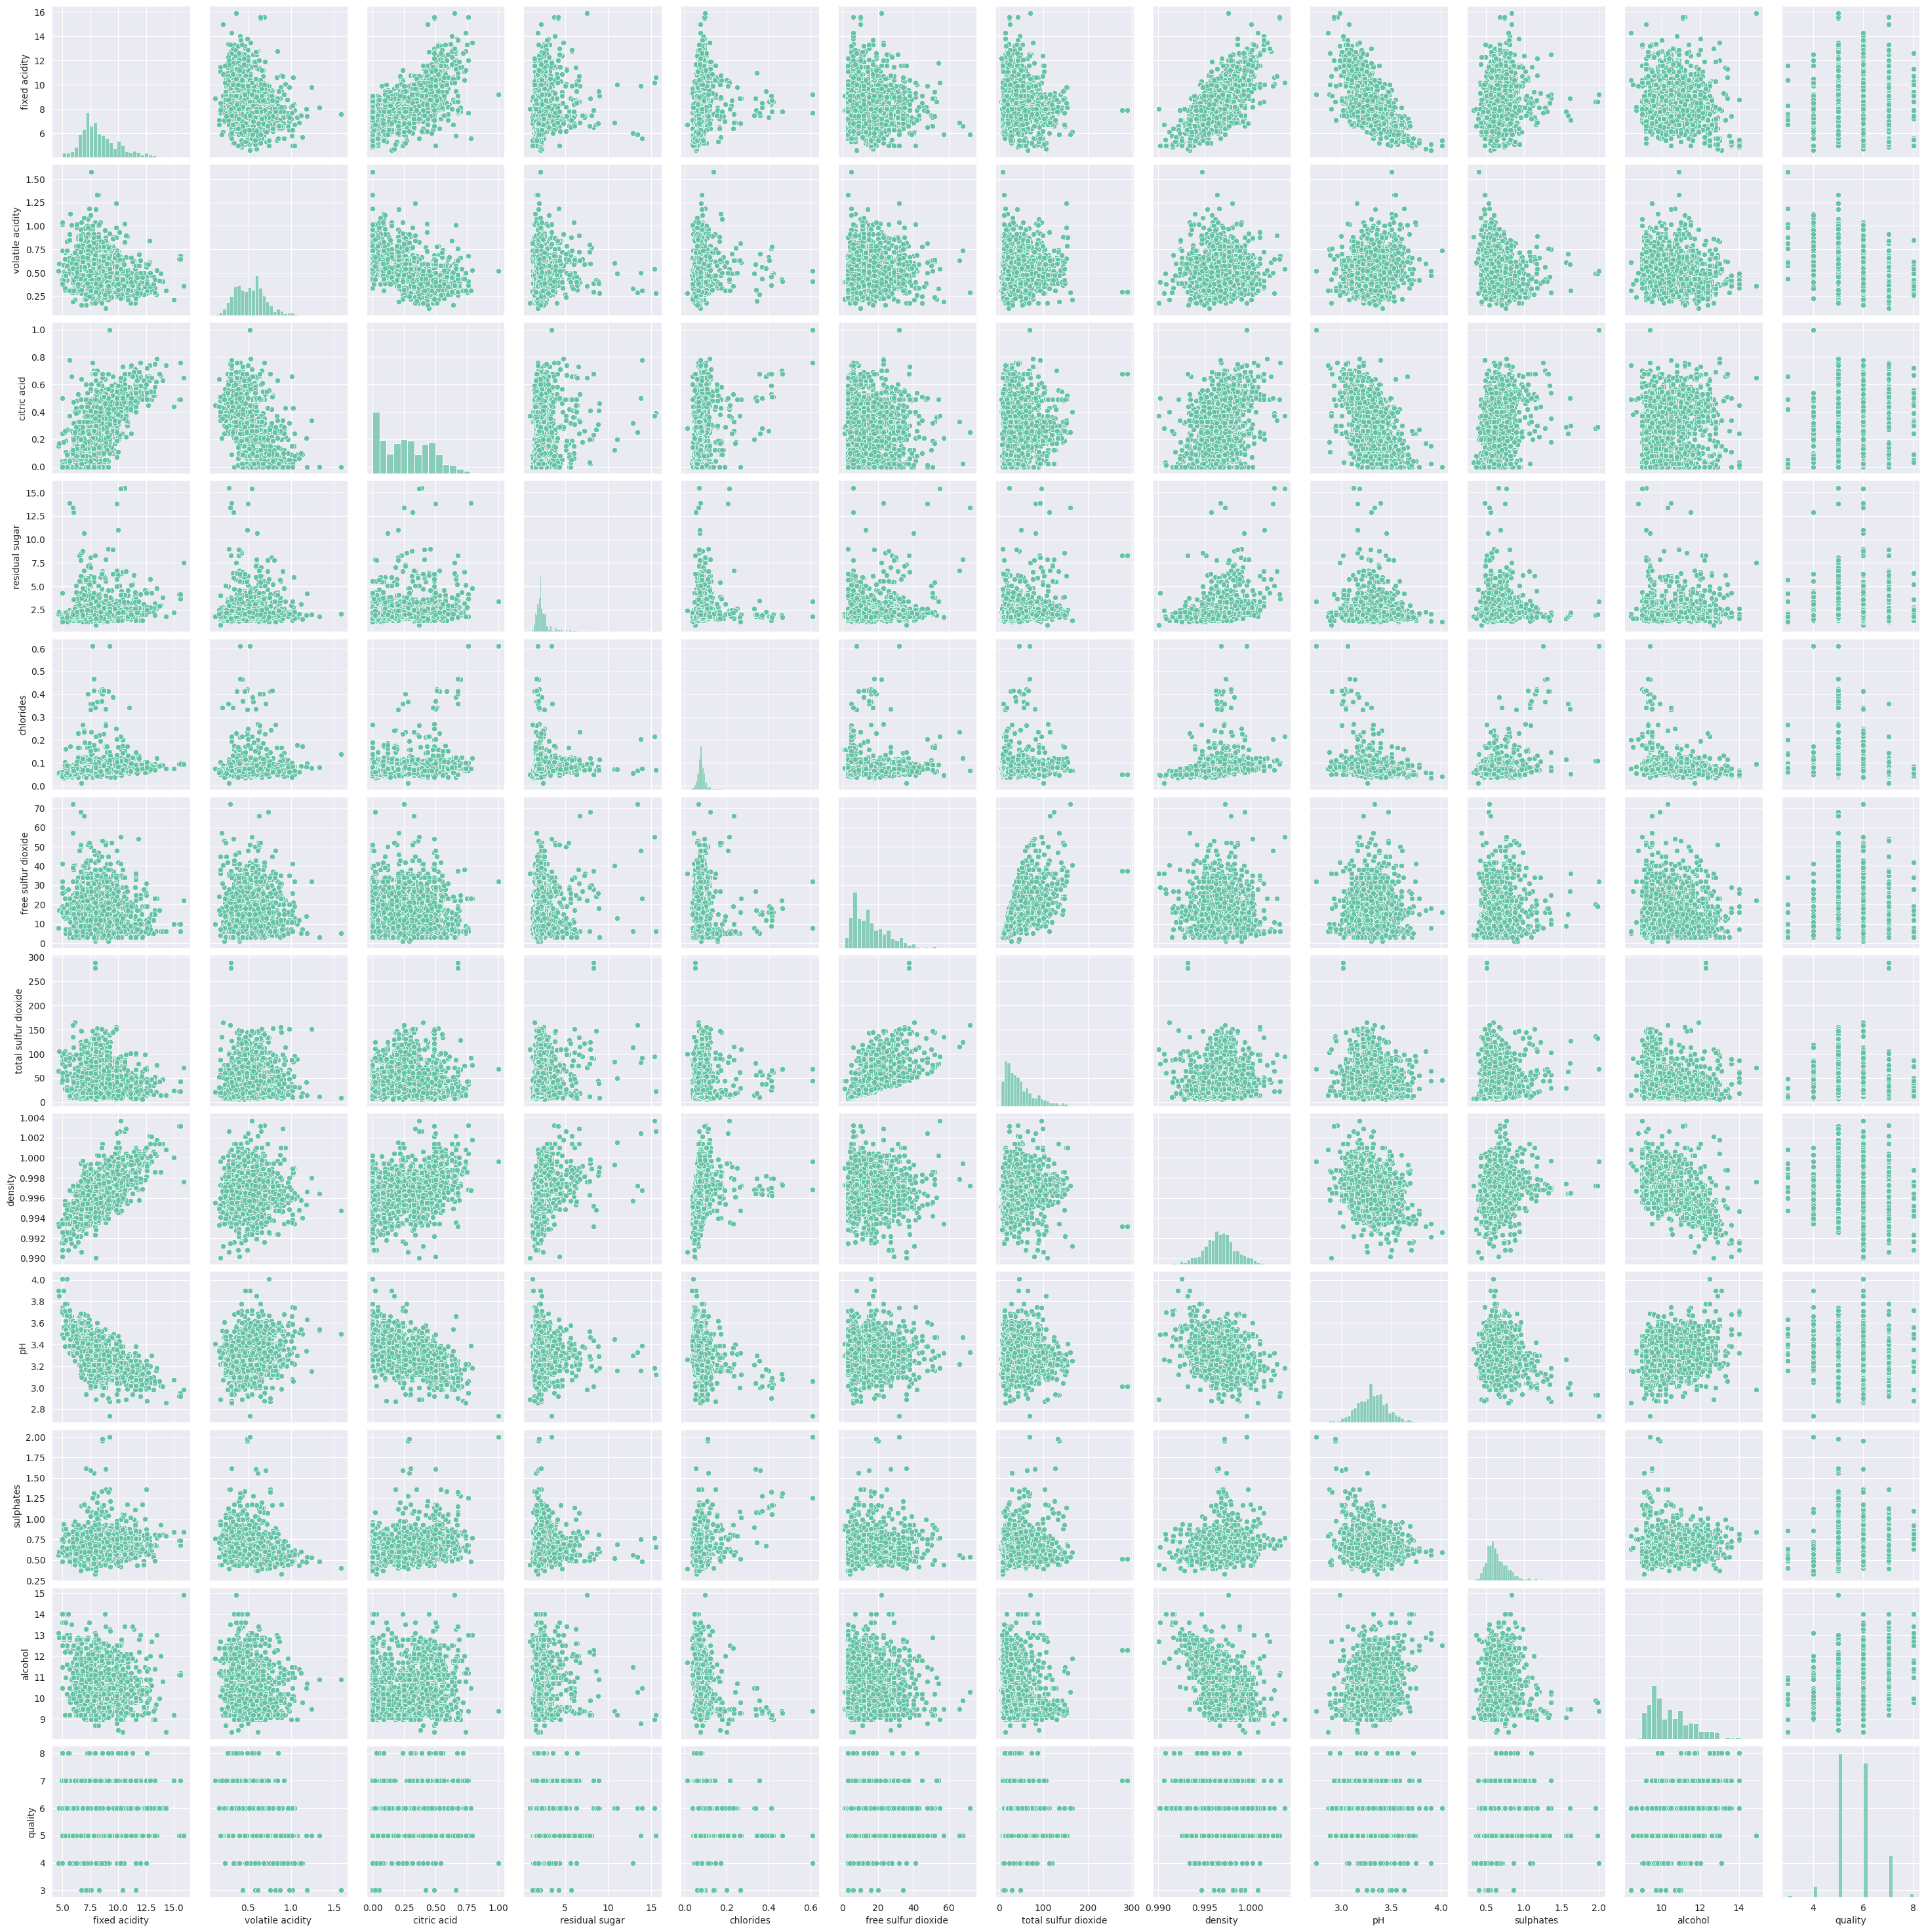

In [ ]:
ax = sns.pairplot(df_wine)

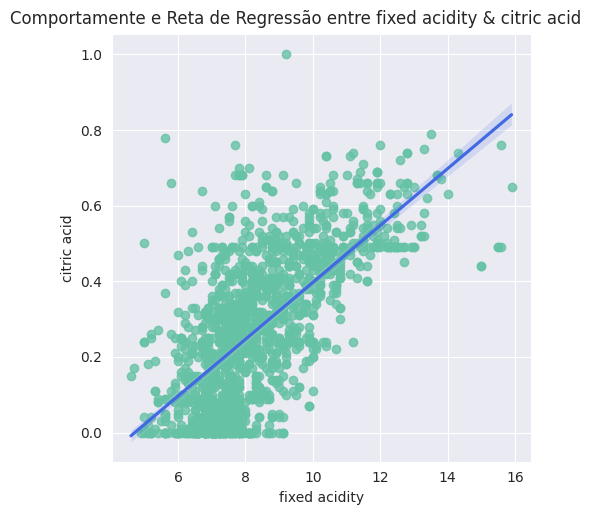

In [ ]:
ax = sns.lmplot(x = 'fixed acidity', y = 'citric acid', data = df_wine,
                line_kws={'color': 'royalblue'});
ax.fig.suptitle('Comportamente e Reta de Regressão entre fixed acidity & citric acid',
                y = 1.02);

# **Regrassão Linear Simples**

# Passo a passo

> # Citric Acid & Fixed Acidity

## Variáveis Dependente e Indepentente

In [ ]:
# Variável dependente
y = df_wine['citric acid'].values

# Variável independente
X = df_wine['fixed acidity'].values

X = X.reshape(-1, 1)

In [ ]:
# print(f'{y = }\n{X = }')

## Separando dados de treino e teste

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size = 0.3,
    random_state = 2424
)

print(f'{len(X_train) = }\n{len(y_train) = }\n\n{len(X_test) = }\n{len(y_test) = }')

len(X_train) = 1119
len(y_train) = 1119

len(X_test) = 480
len(y_test) = 480


## Criando o modelo

In [ ]:
modelo = LinearRegression()

In [ ]:
modelo.fit(X_train, y_train)

LinearRegression()

### Coeficiente de Determinação (R²)

In [ ]:
print(f'R² = {modelo.score(X_train, y_train).round(2)}')

R² = 0.46


In [ ]:
y_previsto = modelo.predict(X_test)
print(f'R² previsto = {r2_score(y_test, y_previsto).round(2)}')


R² previsto = 0.42


### Intercepto

In [ ]:
print(f'Intercepto = {modelo.intercept_}')

Intercepto = -0.3518843930834866


### Coeficientes Estimados

In [ ]:
print(f'Coeficientes Estimados = {modelo.coef_}')

Coeficientes Estimados = [0.07527567]


### Coeficiente de Correlação

In [ ]:
df_wine.columns[0]

'fixed acidity'

In [ ]:
dict_size_shape = pd.DataFrame({
    df_wine.columns[0] : df_wine['fixed acidity'],
    df_wine.columns[2] : df_wine['citric acid'],
})

dict_size_shape_corr = dict_size_shape.corr()
print(f'Coeficiente de Correlação entre {df_wine.columns[0]} e {df_wine.columns[2]}: {dict_size_shape_corr.iloc[0, 1].round(2)}')

Coeficiente de Correlação entre fixed acidity e citric acid: 0.67


In [ ]:
print(f'Coeficiente de Correlação entre {df_wine.columns[0]} e {df_wine.columns[2]}: {np.corrcoef(X.reshape(1, -1), y)[0][1].round(2)}')

Coeficiente de Correlação entre fixed acidity e citric acid: 0.67


## Gráfico da Regressão Linear

Text(0, 0.5, 'Citric Acid')

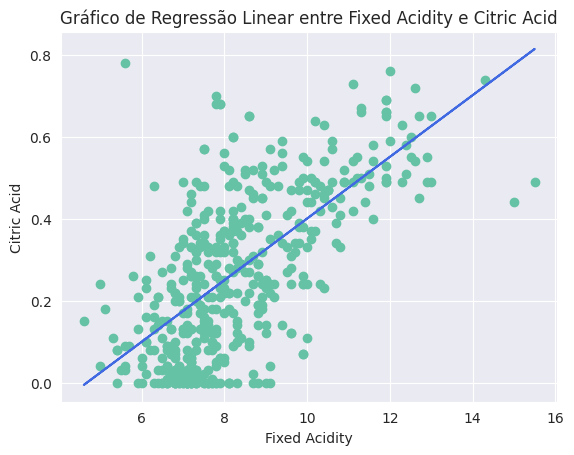

In [ ]:
plt.scatter(X_test, y_test)
plt.title('Gráfico de Regressão Linear entre Fixed Acidity e Citric Acid')
plt.plot(X_test, modelo.predict(X_test), color = 'royalblue')
plt.xlabel('Fixed Acidity')
plt.ylabel('Citric Acid')

### Resíduos

<Axes: title={'center': 'Residuo X Previsao'}, xlabel='Fixed Acidity - Previsao', ylabel='Residuos'>

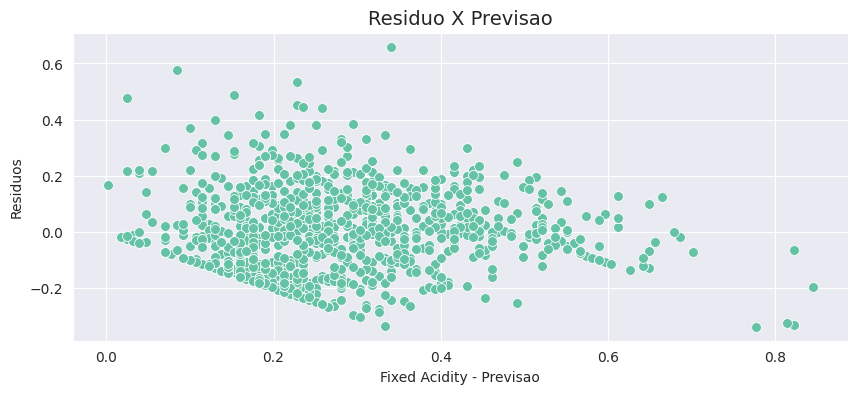

In [ ]:
y_previsto_train = modelo.predict(X_train)
residuo = y_train - y_previsto_train

ax = sns.scatterplot(x = y_previsto_train, y = residuo, s=50) # s= , tamanho dos pontos

ax.figure.set_size_inches(10, 4)
ax.set_title('Residuo X Previsao', fontsize = 14)
ax.set_xlabel('Fixed Acidity - Previsao')
ax.set_ylabel('Residuos')
ax

<Axes: title={'center': 'Residuo X Previsao'}, xlabel='Fixed Acidity - Previsao', ylabel='Residuos²'>

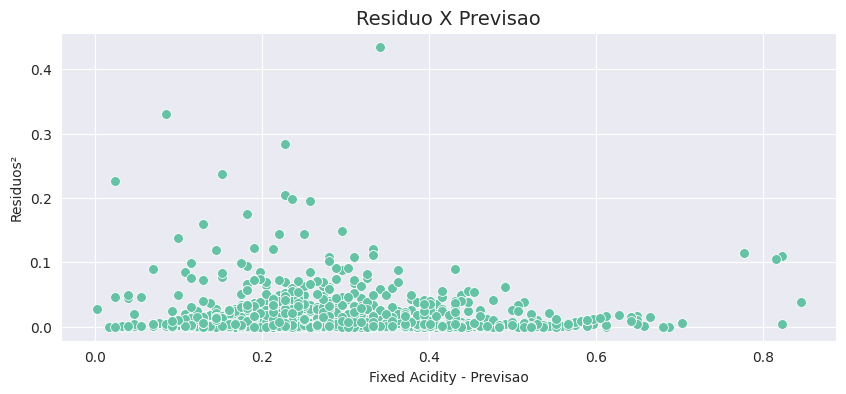

In [ ]:
ax = sns.scatterplot(x = y_previsto_train, y = residuo**2, s=50)

ax.figure.set_size_inches(10, 4)
ax.set_title('Residuo X Previsao', fontsize = 14)
ax.set_xlabel('Fixed Acidity - Previsao')
ax.set_ylabel('Residuos²')
ax

<ipython-input-207-171fc966a5cd>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(residuo)


<Axes: title={'center': 'Distribuicao de frequencias dos residuos'}, xlabel='Fixed Acidity', ylabel='Density'>

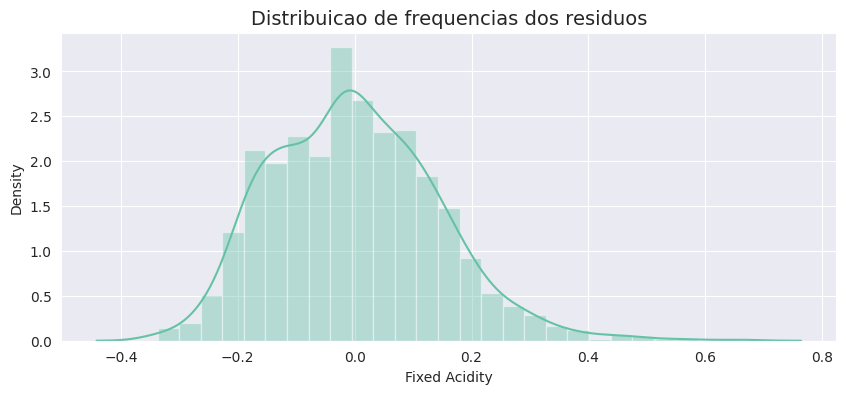

In [ ]:
ax = sns.distplot(residuo)

ax.figure.set_size_inches(10, 4)
ax.set_title('Distribuicao de frequencias dos residuos', fontsize = 14)
ax.set_xlabel('Fixed Acidity')
ax

# Resumido

> # Fixed Acidity & Density

Tamanho dos dados de treino e de teste:
len(X_train) = 1119
len(y_train) = 1119

len(X_test) = 480
len(y_test) = 480

R² = 0.43
R² previsto = 0.43
Intercepto = -615.1617715696702
Coeficientes Estimados = [625.51936577]
Coeficiente de Correlação entre fixed acidity e density: 0.67


Text(0, 0.5, 'Density')

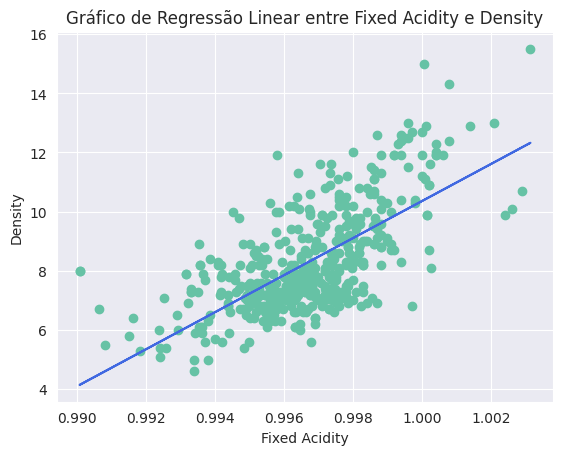

In [ ]:
# Variável dependente
y = df_wine['fixed acidity'].values

# Variável independente
X = df_wine['density'].values
X = X.reshape(-1, 1)

# Separando dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size = 0.3,
    random_state = 2424
)

print(f'Tamanho dos dados de treino e de teste:\n{len(X_train) = }\n{len(y_train) = }\n\n{len(X_test) = }\n{len(y_test) = }\n')

# Criando o modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Coeficiente de Determinação
print(f'R² = {modelo.score(X_test, y_test).round(2)}')

# Coeficiente de Determinação Previsto
y_previsto = modelo.predict(X_test)
print(f'R² previsto = {r2_score(y_test, y_previsto).round(2)}')

# Intercepto
print(f'Intercepto = {modelo.intercept_}')

# Coeficientes Estimados
print(f'Coeficientes Estimados = {modelo.coef_}')

# Coeficiente de Correlação
print(f'Coeficiente de Correlação entre {df_wine.columns[0]} e {df_wine.columns[7]}: {np.corrcoef(X.reshape(1, -1), y)[0][1].round(2)}')

plt.scatter(X_test, y_test)
plt.title('Gráfico de Regressão Linear entre Fixed Acidity e Density')
plt.plot(X_test, modelo.predict(X_test), color = 'royalblue')
plt.xlabel('Fixed Acidity')
plt.ylabel('Density')

<Axes: title={'center': 'Residuo X Previsao'}>

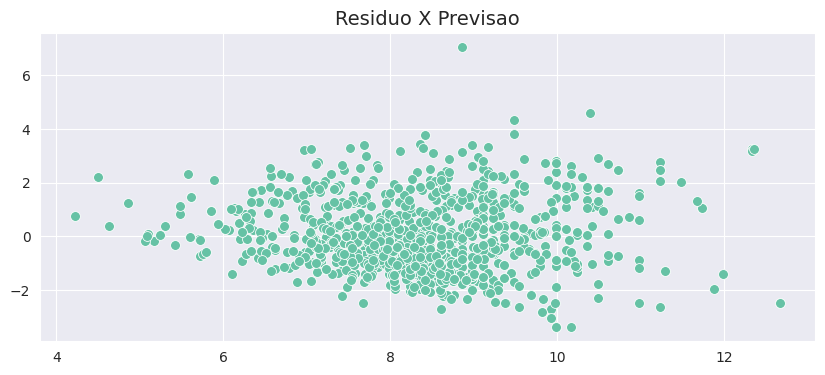

In [ ]:
y_previsto_train = modelo.predict(X_train)
residuo = y_train - y_previsto_train

ax = sns.scatterplot(x = y_previsto_train, y = residuo, s=50) # s= , tamanho dos pontos

ax.figure.set_size_inches(10, 4)
ax.set_title('Residuo X Previsao', fontsize = 14)
ax

<Axes: title={'center': 'Residuo X Previsao'}, ylabel='Residuos²'>

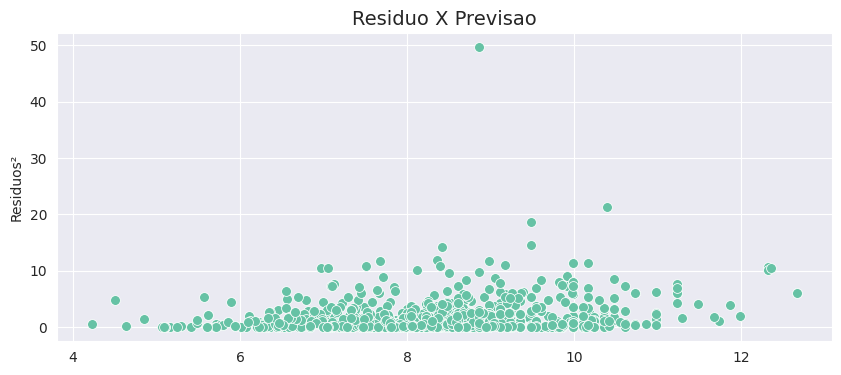

In [ ]:
ax = sns.scatterplot(x = y_previsto_train, y = residuo**2, s=50)

ax.figure.set_size_inches(10, 4)
ax.set_title('Residuo X Previsao', fontsize = 14)
ax.set_ylabel('Residuos²')
ax

<ipython-input-211-171fc966a5cd>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(residuo)


<Axes: title={'center': 'Distribuicao de frequencias dos residuos'}, xlabel='Fixed Acidity', ylabel='Density'>

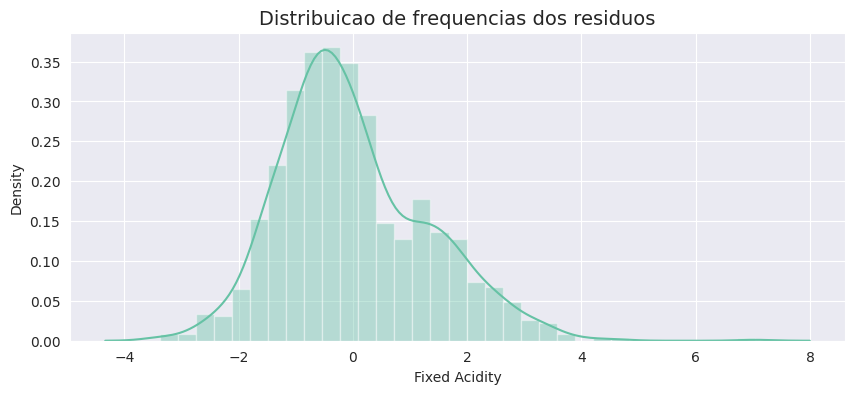

In [ ]:
ax = sns.distplot(residuo)

ax.figure.set_size_inches(10, 4)
ax.set_title('Distribuicao de frequencias dos residuos', fontsize = 14)
ax.set_xlabel('Fixed Acidity')
ax

> # Free Sulfur Dioxide & Total Sulfur Dioxide

Tamanho dos dados de treino e de teste:
len(X_train) = 1119
len(y_train) = 1119

len(X_test) = 480
len(y_test) = 480

R² = 0.48
R² previsto = 0.48
Intercepto = 6.05138462771319
Coeficientes Estimados = [0.20548999]
Coeficiente de Correlação entre free sulfur dioxide e total sulfur dioxide: 0.67


Text(0, 0.5, 'Total Sulfur Dioxide')

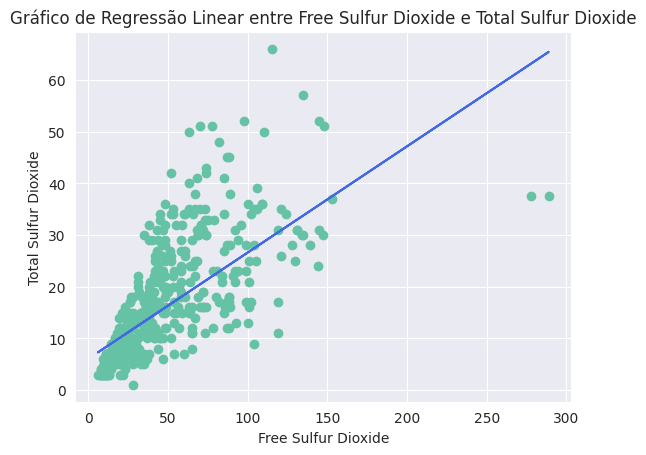

In [ ]:
# Variável dependente
y = df_wine['free sulfur dioxide'].values

# Variável independente
X = df_wine['total sulfur dioxide'].values
X = X.reshape(-1, 1)

# Separando dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size = 0.3,
    random_state = 2424
)

print(f'Tamanho dos dados de treino e de teste:\n{len(X_train) = }\n{len(y_train) = }\n\n{len(X_test) = }\n{len(y_test) = }\n')

# Criando o modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Coeficiente de Determinação
print(f'R² = {modelo.score(X_test, y_test).round(2)}')

# Coeficiente de Determinação Previsto
y_previsto = modelo.predict(X_test)
print(f'R² previsto = {r2_score(y_test, y_previsto).round(2)}')

# Intercepto
print(f'Intercepto = {modelo.intercept_}')

# Coeficientes Estimados
print(f'Coeficientes Estimados = {modelo.coef_}')

# Coeficiente de Correlação
print(f'Coeficiente de Correlação entre {df_wine.columns[5]} e {df_wine.columns[6]}: {np.corrcoef(X.reshape(1, -1), y)[0][1].round(2)}')

plt.scatter(X_test, y_test)
plt.title('Gráfico de Regressão Linear entre Free Sulfur Dioxide e Total Sulfur Dioxide')
plt.plot(X_test, modelo.predict(X_test), color = 'royalblue')
plt.xlabel('Free Sulfur Dioxide')
plt.ylabel('Total Sulfur Dioxide')

<Axes: title={'center': 'Residuo X Previsao'}>

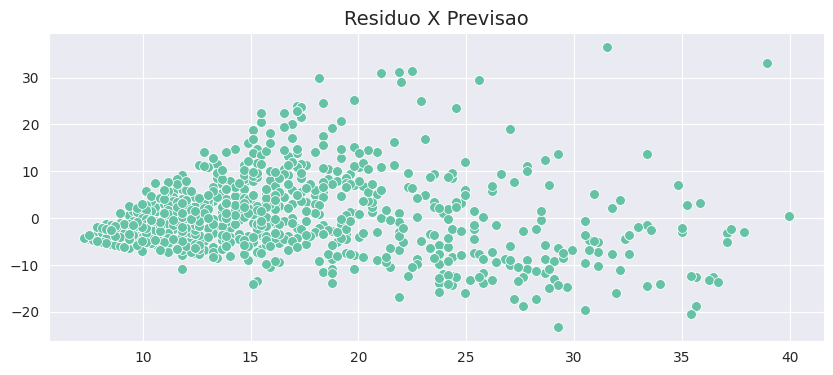

In [ ]:
y_previsto_train = modelo.predict(X_train)
residuo = y_train - y_previsto_train

ax = sns.scatterplot(x = y_previsto_train, y = residuo, s=50) # s= , tamanho dos pontos

ax.figure.set_size_inches(10, 4)
ax.set_title('Residuo X Previsao', fontsize = 14)
ax

<Axes: title={'center': 'Residuo X Previsao'}, ylabel='Residuos²'>

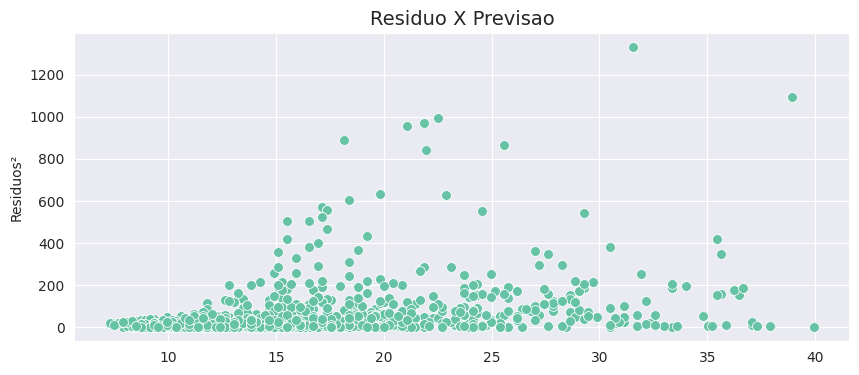

In [ ]:
ax = sns.scatterplot(x = y_previsto_train, y = residuo**2, s=50)

ax.figure.set_size_inches(10, 4)
ax.set_title('Residuo X Previsao', fontsize = 14)
ax.set_ylabel('Residuos²')
ax

<ipython-input-215-171fc966a5cd>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(residuo)


<Axes: title={'center': 'Distribuicao de frequencias dos residuos'}, xlabel='Fixed Acidity', ylabel='Density'>

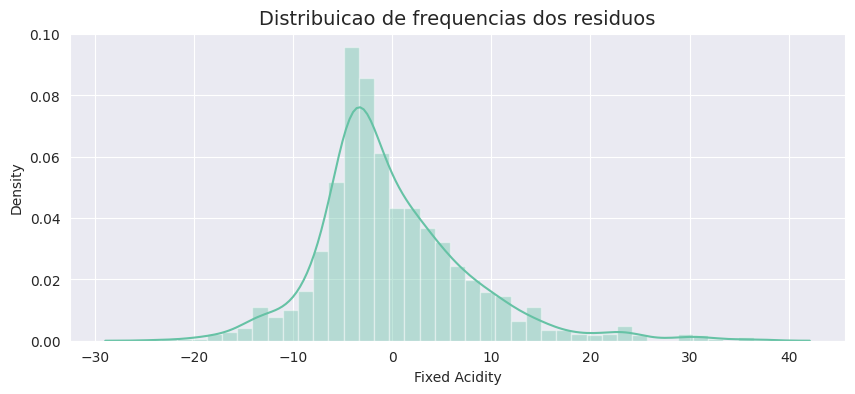

In [ ]:
ax = sns.distplot(residuo)

ax.figure.set_size_inches(10, 4)
ax.set_title('Distribuicao de frequencias dos residuos', fontsize = 14)
ax.set_xlabel('Fixed Acidity')
ax

> # Fixed Acidity & pH

Tamanho dos dados de treino e de teste:
len(X_train) = 1119
len(y_train) = 1119

len(X_test) = 480
len(y_test) = 480

R² = 0.51
R² previsto = 0.51
Intercepto = 33.428549212612815
Coeficientes Estimados = [-7.58126652]
Coeficiente de Correlação entre fixed acidity e pH: -0.68


Text(0, 0.5, 'pH')

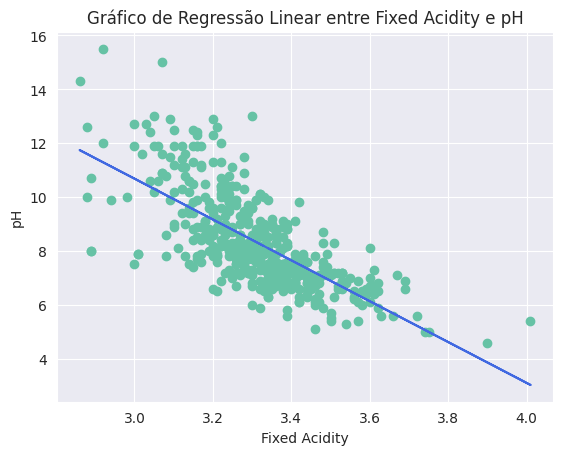

In [ ]:
# Variável dependente
y = df_wine['fixed acidity'].values

# Variável independente
X = df_wine['pH'].values
X = X.reshape(-1, 1)

# Separando dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size = 0.3,
    random_state = 2424
)

print(f'Tamanho dos dados de treino e de teste:\n{len(X_train) = }\n{len(y_train) = }\n\n{len(X_test) = }\n{len(y_test) = }\n')

# Criando o modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Coeficiente de Determinação
print(f'R² = {modelo.score(X_test, y_test).round(2)}')

# Coeficiente de Determinação Previsto
y_previsto = modelo.predict(X_test)
print(f'R² previsto = {r2_score(y_test, y_previsto).round(2)}')

# Intercepto
print(f'Intercepto = {modelo.intercept_}')

# Coeficientes Estimados
print(f'Coeficientes Estimados = {modelo.coef_}')

# Coeficiente de Correlação
print(f'Coeficiente de Correlação entre {df_wine.columns[0]} e {df_wine.columns[8]}: {np.corrcoef(X.reshape(1, -1), y)[0][1].round(2)}')

plt.scatter(X_test, y_test)
plt.title('Gráfico de Regressão Linear entre Fixed Acidity e pH')
plt.plot(X_test, modelo.predict(X_test), color = 'royalblue')
plt.xlabel('Fixed Acidity')
plt.ylabel('pH')

<Axes: title={'center': 'Residuo X Previsao'}>

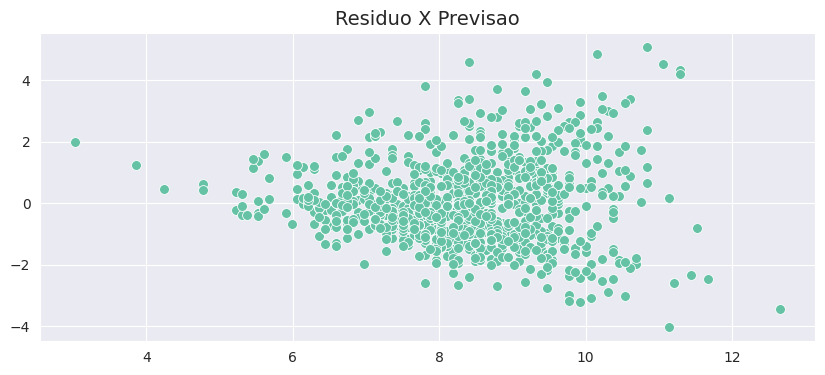

In [ ]:
y_previsto_train = modelo.predict(X_train)
residuo = y_train - y_previsto_train

ax = sns.scatterplot(x = y_previsto_train, y = residuo, s=50) # s= , tamanho dos pontos

ax.figure.set_size_inches(10, 4)
ax.set_title('Residuo X Previsao', fontsize = 14)
ax

<Axes: title={'center': 'Residuo X Previsao'}, ylabel='Residuos²'>

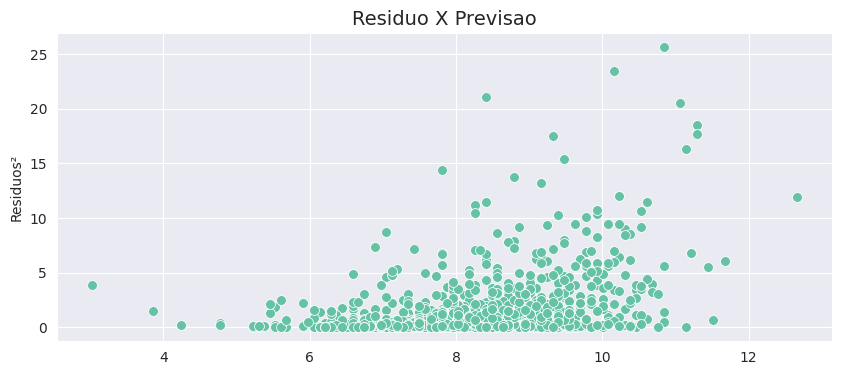

In [ ]:
ax = sns.scatterplot(x = y_previsto_train, y = residuo**2, s=50)

ax.figure.set_size_inches(10, 4)
ax.set_title('Residuo X Previsao', fontsize = 14)
ax.set_ylabel('Residuos²')
ax

<ipython-input-219-171fc966a5cd>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(residuo)


<Axes: title={'center': 'Distribuicao de frequencias dos residuos'}, xlabel='Fixed Acidity', ylabel='Density'>

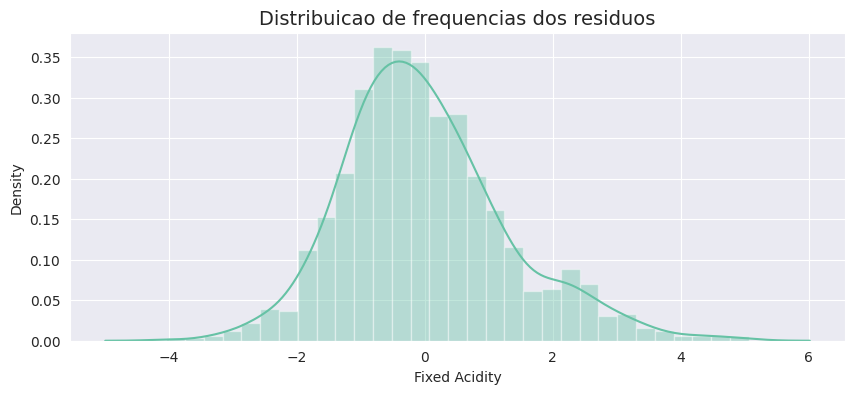

In [ ]:
ax = sns.distplot(residuo)

ax.figure.set_size_inches(10, 4)
ax.set_title('Distribuicao de frequencias dos residuos', fontsize = 14)
ax.set_xlabel('Fixed Acidity')
ax

> # Citric Acid & Volatile Acidity

Tamanho dos dados de treino e de teste:
len(X_train) = 1119
len(y_train) = 1119

len(X_test) = 480
len(y_test) = 480

R² = 0.34
R² previsto = 0.34
Intercepto = 0.5789676638847198
Coeficientes Estimados = [-0.57402336]
Coeficiente de Correlação entre citric acid e volatile acidity: -0.55


Text(0, 0.5, 'Volatile Acidity')

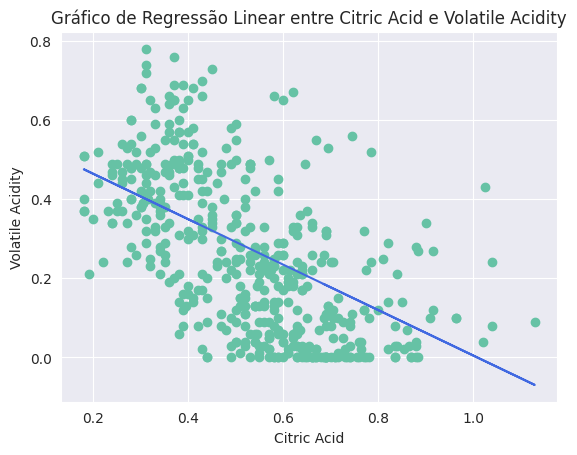

In [ ]:
# Variável dependente
y = df_wine['citric acid'].values

# Variável independente
X = df_wine['volatile acidity'].values
X = X.reshape(-1, 1)

# Separando dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size = 0.3,
    random_state = 2424
)

print(f'Tamanho dos dados de treino e de teste:\n{len(X_train) = }\n{len(y_train) = }\n\n{len(X_test) = }\n{len(y_test) = }\n')

# Criando o modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Coeficiente de Determinação
print(f'R² = {modelo.score(X_test, y_test).round(2)}')

# Coeficiente de Determinação Previsto
y_previsto = modelo.predict(X_test)
print(f'R² previsto = {r2_score(y_test, y_previsto).round(2)}')

# Intercepto
print(f'Intercepto = {modelo.intercept_}')

# Coeficientes Estimados
print(f'Coeficientes Estimados = {modelo.coef_}')

# Coeficiente de Correlação
print(f'Coeficiente de Correlação entre {df_wine.columns[2]} e {df_wine.columns[1]}: {np.corrcoef(X.reshape(1, -1), y)[0][1].round(2)}')

plt.scatter(X_test, y_test)
plt.title('Gráfico de Regressão Linear entre Citric Acid e Volatile Acidity')
plt.plot(X_test, modelo.predict(X_test), color = 'royalblue')
plt.xlabel('Citric Acid')
plt.ylabel('Volatile Acidity')

<Axes: title={'center': 'Residuo X Previsao'}>

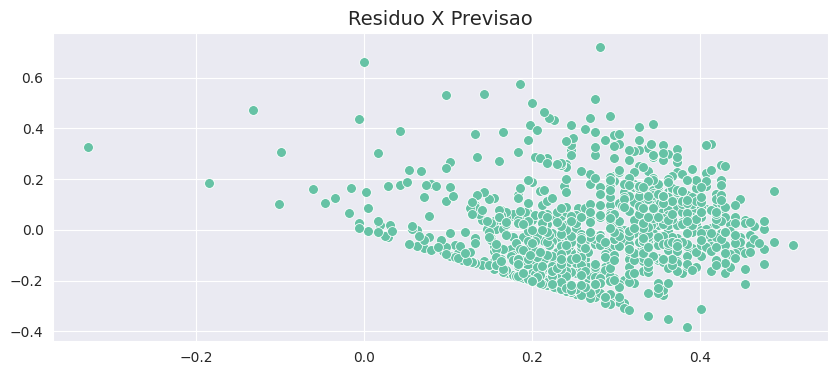

In [ ]:
y_previsto_train = modelo.predict(X_train)
residuo = y_train - y_previsto_train

ax = sns.scatterplot(x = y_previsto_train, y = residuo, s=50) # s= , tamanho dos pontos

ax.figure.set_size_inches(10, 4)
ax.set_title('Residuo X Previsao', fontsize = 14)
ax

<Axes: title={'center': 'Residuo X Previsao'}, ylabel='Residuos²'>

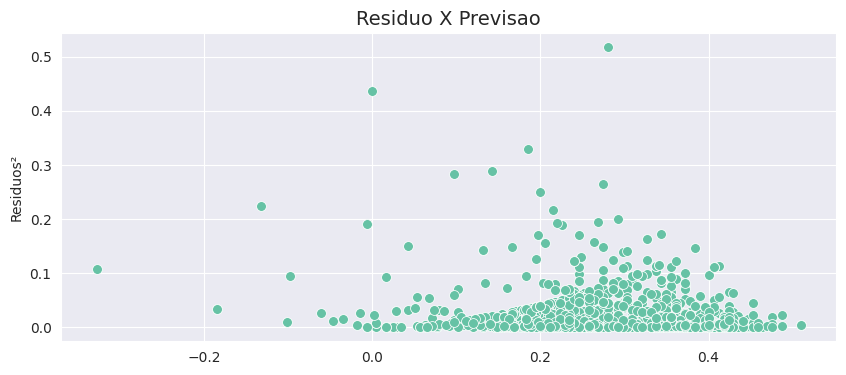

In [ ]:
ax = sns.scatterplot(x = y_previsto_train, y = residuo**2, s=50)

ax.figure.set_size_inches(10, 4)
ax.set_title('Residuo X Previsao', fontsize = 14)
ax.set_ylabel('Residuos²')
ax

<ipython-input-223-171fc966a5cd>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(residuo)


<Axes: title={'center': 'Distribuicao de frequencias dos residuos'}, xlabel='Fixed Acidity', ylabel='Density'>

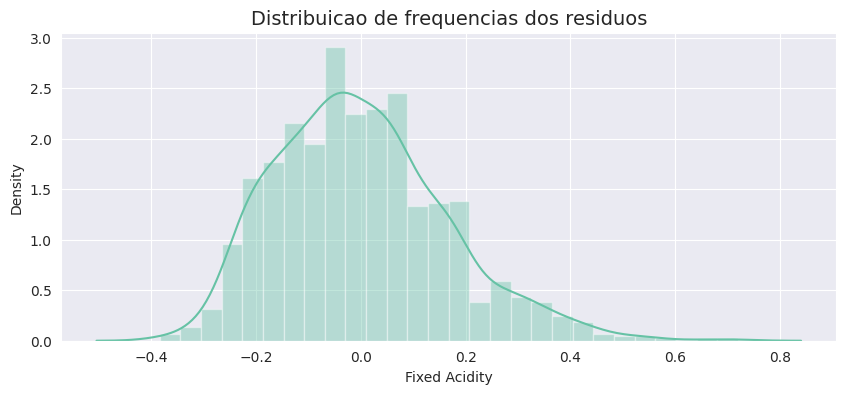

In [ ]:
ax = sns.distplot(residuo)

ax.figure.set_size_inches(10, 4)
ax.set_title('Distribuicao de frequencias dos residuos', fontsize = 14)
ax.set_xlabel('Fixed Acidity')
ax

# **Regressão Linear Múltipla Quality**

In [ ]:
df_wine.corr().round(4)

fixed acidity  volatile acidity  citric acid  \
fixed acidity                1.0000           -0.2561       0.6717   
volatile acidity            -0.2561            1.0000      -0.5525   
citric acid                  0.6717           -0.5525       1.0000   
residual sugar               0.1148            0.0019       0.1436   
chlorides                    0.0937            0.0613       0.2038   
free sulfur dioxide         -0.1538           -0.0105      -0.0610   
total sulfur dioxide        -0.1132            0.0765       0.0355   
density                      0.6680            0.0220       0.3649   
pH                          -0.6830            0.2349      -0.5419   
sulphates                    0.1830           -0.2610       0.3128   
alcohol                     -0.0617           -0.2023       0.1099   
quality                      0.1241           -0.3906       0.2264   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity                 0.1148     0.0937              -0.1538   
volatile acidity              0.0019     0.0613              -0.0105   
citric acid                   0.1436     0.2038              -0.0610   
residual sugar                1.0000     0.0556               0.1870   
chlorides                     0.0556     1.0000               0.0056   
free sulfur dioxide           0.1870     0.0056               1.0000   
total sulfur dioxide          0.2030     0.0474               0.6677   
density                       0.3553     0.2006              -0.0219   
pH                           -0.0857    -0.2650               0.0704   
sulphates                     0.0055     0.3713               0.0517   
alcohol                       0.0421    -0.2211              -0.0694   
quality                       0.0137    -0.1289              -0.0507   

                      total sulfur dioxide  density      pH  sulphates  \
fixed acidity                      -0.1132   0.6680 -0.6830     0.1830   
volatile acidity                    0.0765   0.0220  0.2349    -0.2610   
citric acid                         0.0355   0.3649 -0.5419     0.3128   
residual sugar                      0.2030   0.3553 -0.0857     0.0055   
chlorides                           0.0474   0.2006 -0.2650     0.3713   
free sulfur dioxide                 0.6677  -0.0219  0.0704     0.0517   
total sulfur dioxide                1.0000   0.0713 -0.0665     0.0429   
density                             0.0713   1.0000 -0.3417     0.1485   
pH                                 -0.0665  -0.3417  1.0000    -0.1966   
sulphates                           0.0429   0.1485 -0.1966     1.0000   
alcohol                            -0.2057  -0.4962  0.2056     0.0936   
quality                            -0.1851  -0.1749 -0.0577     0.2514   

                      alcohol  quality  
fixed acidity         -0.0617   0.1241  
volatile acidity      -0.2023  -0.3906  
citric acid            0.1099   0.2264  
residual sugar         0.0421   0.0137  
chlorides             -0.2211  -0.1289  
free sulfur dioxide   -0.0694  -0.0507  
total sulfur dioxide  -0.2057  -0.1851  
density               -0.4962  -0.1749  
pH                     0.2056  -0.0577  
sulphates              0.0936   0.2514  
alcohol                1.0000   0.4762  
quality                0.4762   1.0000

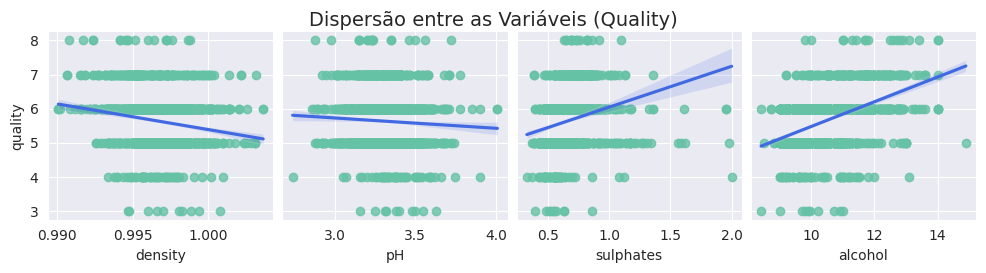

In [ ]:
ax = sns.pairplot(df_wine, y_vars='quality', x_vars=['density', 'pH', 'sulphates', 'alcohol'],
                  kind='reg', plot_kws={'line_kws':{'color':'royalblue'}})
ax.fig.suptitle('Dispersão entre as Variáveis (Quality)', fontsize = 14, y = 1.05)
ax

## Variáveis dependentes e independentes

In [ ]:
# Variável dependente
y = df_wine.iloc[:, 11].values

# Variável independente
X = df_wine.iloc[:, [7, 8, 9, 10]].values

X, y = SMOTE().fit_resample(X, y)

X = MinMaxScaler(copy=False).fit_transform(X)

In [ ]:
print(f'{y = }\n{X = }')

y = array([5, 5, 5, ..., 8, 8, 8])
X = array([[0.56754772, 0.60629921, 0.13772455, 0.15384615],
       [0.49412628, 0.36220472, 0.20958084, 0.21538462],
       [0.50881057, 0.40944882, 0.19161677, 0.21538462],
       ...,
       [0.46426103, 0.32235554, 0.35267187, 0.50774737],
       [0.34755952, 0.37401986, 0.25814273, 0.4743563 ],
       [0.36131092, 0.36865301, 0.22617726, 0.74197535]])


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size = 0.3,
    random_state = 2424
)

print(f'{len(X_train) = }\n{len(y_train) = }\n\n{len(X_test) = }\n{len(y_test) = }')

len(X_train) = 2860
len(y_train) = 2860

len(X_test) = 1226
len(y_test) = 1226


In [ ]:
modelo_multipla = LinearRegression()

In [ ]:
modelo_multipla.fit(X_train, y_train)

LinearRegression()

In [ ]:
print(f'R² = {modelo_multipla.score(X_train, y_train).round(2)}')

R² = 0.58


In [ ]:
print(f'Intercepto = {modelo_multipla.intercept_}')

Intercepto = 6.437267557673543


In [ ]:
print(f'Coeficientes Estimados = {modelo_multipla.coef_}')

Coeficientes Estimados = [-1.84385973 -5.47676     3.42481077  4.9637223 ]


In [ ]:
index = ['intercepto', 'density', 'pH', 'sulpahtes', 'alcohol']

pd.DataFrame(data = np.append(modelo_multipla.intercept_, modelo_multipla.coef_), index = index,
                              columns = ['Parametros'])

Parametros
intercepto    6.437268
density      -1.843860
pH           -5.476760
sulpahtes     3.424811
alcohol       4.963722

## Usando OLS

In [ ]:
df_wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [ ]:
modelo_multipla_ajustado = OLS(df_wine.iloc[:, 11], df_wine.iloc[:, [7, 8, 9, 10]])

modelo_multipla_treinado = modelo_multipla_ajustado.fit()

modelo_multipla_treinado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                quality   R-squared (uncentered):                   0.986
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                          2.727e+04
Date:                Mon, 08 May 2023   Prob (F-statistic):                        0.00
Time:                        00:58:50   Log-Likelihood:                         -1660.4
No. Observations:                1599   AIC:                                      3329.
Df Residuals:                    1595   BIC:                                      3350.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
density        3.2947      0.395      8.331      0.000       2.519       4.070
pH            -0.6247      0.115     -5.423      0.000      -0.851      -0.399
sulphates      0.8632      0.104      8.281      0.000       0.659       1.068
alcohol        0.3696      0.017     22.374      0.000       0.337       0.402
==============================================================================
Omnibus:                       42.339   Durbin-Watson:                   1.752
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               68.574
Skew:                          -0.232   Prob(JB):                     1.29e-15
Kurtosis:                       3.902   Cond. No.                         265.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# **Regressão Linear Múltipla Fixed Acidity**

In [ ]:
df_wine.corr().round(4)

fixed acidity  volatile acidity  citric acid  \
fixed acidity                1.0000           -0.2561       0.6717   
volatile acidity            -0.2561            1.0000      -0.5525   
citric acid                  0.6717           -0.5525       1.0000   
residual sugar               0.1148            0.0019       0.1436   
chlorides                    0.0937            0.0613       0.2038   
free sulfur dioxide         -0.1538           -0.0105      -0.0610   
total sulfur dioxide        -0.1132            0.0765       0.0355   
density                      0.6680            0.0220       0.3649   
pH                          -0.6830            0.2349      -0.5419   
sulphates                    0.1830           -0.2610       0.3128   
alcohol                     -0.0617           -0.2023       0.1099   
quality                      0.1241           -0.3906       0.2264   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity                 0.1148     0.0937              -0.1538   
volatile acidity              0.0019     0.0613              -0.0105   
citric acid                   0.1436     0.2038              -0.0610   
residual sugar                1.0000     0.0556               0.1870   
chlorides                     0.0556     1.0000               0.0056   
free sulfur dioxide           0.1870     0.0056               1.0000   
total sulfur dioxide          0.2030     0.0474               0.6677   
density                       0.3553     0.2006              -0.0219   
pH                           -0.0857    -0.2650               0.0704   
sulphates                     0.0055     0.3713               0.0517   
alcohol                       0.0421    -0.2211              -0.0694   
quality                       0.0137    -0.1289              -0.0507   

                      total sulfur dioxide  density      pH  sulphates  \
fixed acidity                      -0.1132   0.6680 -0.6830     0.1830   
volatile acidity                    0.0765   0.0220  0.2349    -0.2610   
citric acid                         0.0355   0.3649 -0.5419     0.3128   
residual sugar                      0.2030   0.3553 -0.0857     0.0055   
chlorides                           0.0474   0.2006 -0.2650     0.3713   
free sulfur dioxide                 0.6677  -0.0219  0.0704     0.0517   
total sulfur dioxide                1.0000   0.0713 -0.0665     0.0429   
density                             0.0713   1.0000 -0.3417     0.1485   
pH                                 -0.0665  -0.3417  1.0000    -0.1966   
sulphates                           0.0429   0.1485 -0.1966     1.0000   
alcohol                            -0.2057  -0.4962  0.2056     0.0936   
quality                            -0.1851  -0.1749 -0.0577     0.2514   

                      alcohol  quality  
fixed acidity         -0.0617   0.1241  
volatile acidity      -0.2023  -0.3906  
citric acid            0.1099   0.2264  
residual sugar         0.0421   0.0137  
chlorides             -0.2211  -0.1289  
free sulfur dioxide   -0.0694  -0.0507  
total sulfur dioxide  -0.2057  -0.1851  
density               -0.4962  -0.1749  
pH                     0.2056  -0.0577  
sulphates              0.0936   0.2514  
alcohol                1.0000   0.4762  
quality                0.4762   1.0000

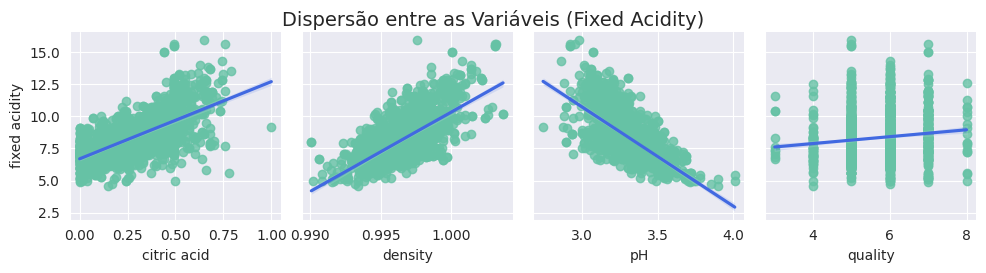

In [ ]:
ax = sns.pairplot(df_wine, y_vars='fixed acidity', x_vars=['citric acid', 'density', 'pH', 'quality'],
                  kind='reg', plot_kws={'line_kws':{'color':'royalblue'}})
ax.fig.suptitle('Dispersão entre as Variáveis (Fixed Acidity)', fontsize = 14, y = 1.05)
ax

## Variáveis dependentes e independentes

In [ ]:
df_wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [ ]:
# Variável dependente
y = df_wine.iloc[:, 0].values

# Variável independente
X = df_wine.iloc[:, [2, 7, 8, 11]].values

In [ ]:
print(f'{y = }\n{X = }')

y = array([7.4, 7.8, 7.8, ..., 6.3, 5.9, 6. ])
X = array([[0.     , 0.9978 , 3.51   , 5.     ],
       [0.     , 0.9968 , 3.2    , 5.     ],
       [0.04   , 0.997  , 3.26   , 5.     ],
       ...,
       [0.13   , 0.99574, 3.42   , 6.     ],
       [0.12   , 0.99547, 3.57   , 5.     ],
       [0.47   , 0.99549, 3.39   , 6.     ]])


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size = 0.3,
    random_state = 2424
)

print(f'{len(X_train) = }\n{len(y_train) = }\n\n{len(X_test) = }\n{len(y_test) = }')

len(X_train) = 1119
len(y_train) = 1119

len(X_test) = 480
len(y_test) = 480


In [ ]:
modelo_multipla = LinearRegression()

In [ ]:
modelo_multipla.fit(X_train, y_train)

LinearRegression()

In [ ]:
print(f'R² = {modelo_multipla.score(X_train, y_train).round(2)}')

R² = 0.75


In [ ]:
y_previsto = modelo_multipla.predict(X_test)
print(f'R² previsto = {r2_score(y_test, y_previsto).round(2)}')

R² previsto = 0.79


In [ ]:
print(f'Intercepto = {modelo_multipla.intercept_}')

Intercepto = -399.4523208492868


In [ ]:
print(f'Coeficientes Estimados = {modelo_multipla.coef_}')

Coeficientes Estimados = [ 2.69451010e+00  4.20091836e+02 -3.93742223e+00  2.38723787e-01]


In [ ]:
index = ['intercepto', 'density', 'pH', 'sulpahtes', 'alcohol']

pd.DataFrame(data = np.append(modelo_multipla.intercept_, modelo_multipla.coef_), index = index,
                              columns = ['Parametros'])

Parametros
intercepto -399.452321
density       2.694510
pH          420.091836
sulpahtes    -3.937422
alcohol       0.238724

In [ ]:
df_wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

## Usando OLS

In [ ]:
df_wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [ ]:
modelo_multipla_ajustado = OLS(df_wine.iloc[:, 0], df_wine.iloc[:, [2, 7, 8, 11]])

modelo_multipla_treinado = modelo_multipla_ajustado.fit()

modelo_multipla_treinado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          fixed acidity   R-squared (uncentered):                   0.984
Model:                            OLS   Adj. R-squared (uncentered):              0.984
Method:                 Least Squares   F-statistic:                          2.421e+04
Date:                Mon, 08 May 2023   Prob (F-statistic):                        0.00
Time:                        00:58:54   Log-Likelihood:                         -2394.8
No. Observations:                1599   AIC:                                      4798.
Df Residuals:                    1595   BIC:                                      4819.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
citric acid     3.6380      0.171     21.234      0.000       3.302       3.974
density        24.7710      0.723     34.245      0.000      23.352      26.190
pH             -5.2609      0.208    -25.319      0.000      -5.668      -4.853
quality         0.0113      0.034      0.329      0.742      -0.056       0.079
==============================================================================
Omnibus:                       57.507   Durbin-Watson:                   1.444
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              140.174
Skew:                           0.149   Prob(JB):                     3.64e-31
Kurtosis:                       4.420   Cond. No.                         186.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> * A variável a ser desconsiderada é a Quality